1. Loading Data
2. First look into the data (Exploratory Data Analysis)
3. Feature Enginnering.  
4. Feature Correlation.

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings (action = 'ignore')

# 1. Loading dataset

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 2. First look into the data (EDA)

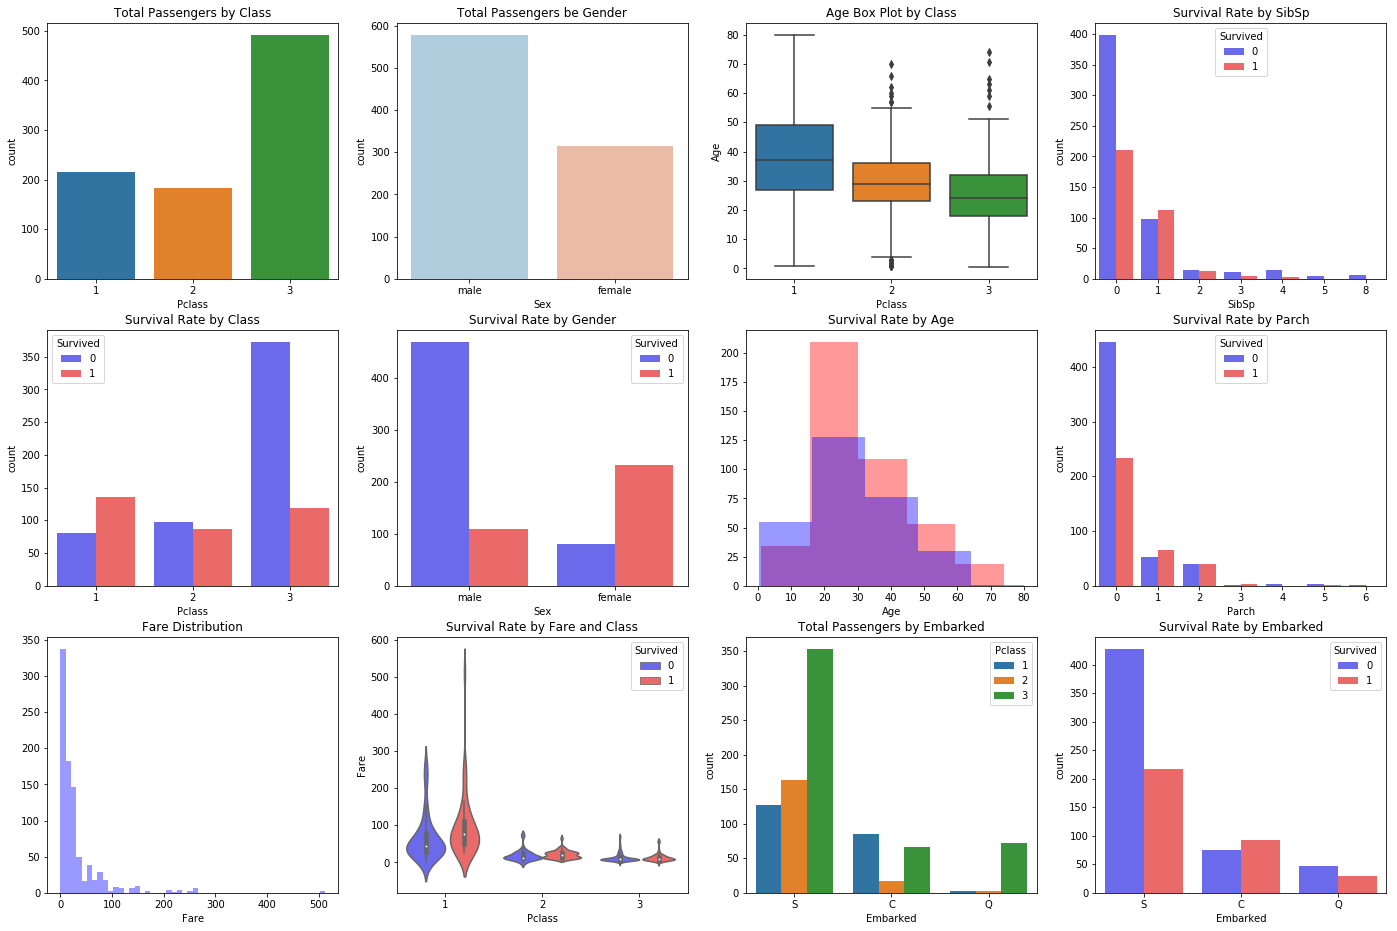

In [7]:
fig, ax = plt.subplots(3,4, figsize = (24,16))

sns.countplot('Pclass', data = train, ax = ax[0,0])
sns.countplot('Sex', data = train, ax=ax[0,1], palette = 'RdBu_r')
sns.boxplot(x='Pclass', y='Age', data = train, ax = ax[0,2])
sns.countplot('SibSp', hue = 'Survived', data = train, ax =ax[0,3], palette = 'seismic')

sns.countplot('Pclass', hue = 'Survived', data = train, ax = ax[1,0], palette = 'seismic')
sns.countplot('Sex', hue = 'Survived', data =train, ax = ax[1,1], palette = 'seismic')
sns.distplot(train[train['Survived']==0]['Age'].dropna(), ax=ax[1,2], kde = False, color = 'r', bins = 5)
sns.distplot(train[train['Survived']==1]['Age'].dropna(), ax=ax[1,2], kde = False, color = 'b', bins = 5)
sns.countplot('Parch', hue = 'Survived', data = train, ax = ax[1,3], palette = 'seismic')

sns.distplot(train['Fare'].dropna(), ax = ax[2,0], kde = False, color = 'b')
sns.violinplot(x='Pclass', y='Fare', hue = 'Survived', data = train, ax = ax[2,1], palette = 'seismic')
sns.countplot('Embarked', hue = 'Pclass', data = train, ax=ax[2,2])
sns.countplot('Embarked', hue = 'Survived', data = train, ax = ax[2,3], palette = 'seismic')


ax[0,0].set_title('Total Passengers by Class')
ax[0,1].set_title('Total Passengers be Gender')
ax[0,2].set_title('Age Box Plot by Class')
ax[0,3].set_title('Survival Rate by SibSp')

ax[1,0].set_title('Survival Rate by Class')
ax[1,1].set_title('Survival Rate by Gender')
ax[1,2].set_title('Survival Rate by Age')
ax[1,3].set_title('Survival Rate by Parch')

ax[2,0].set_title('Fare Distribution')
ax[2,1].set_title('Survival Rate by Fare and Class')
ax[2,2].set_title('Total Passengers by Embarked')
ax[2,3].set_title('Survival Rate by Embarked')

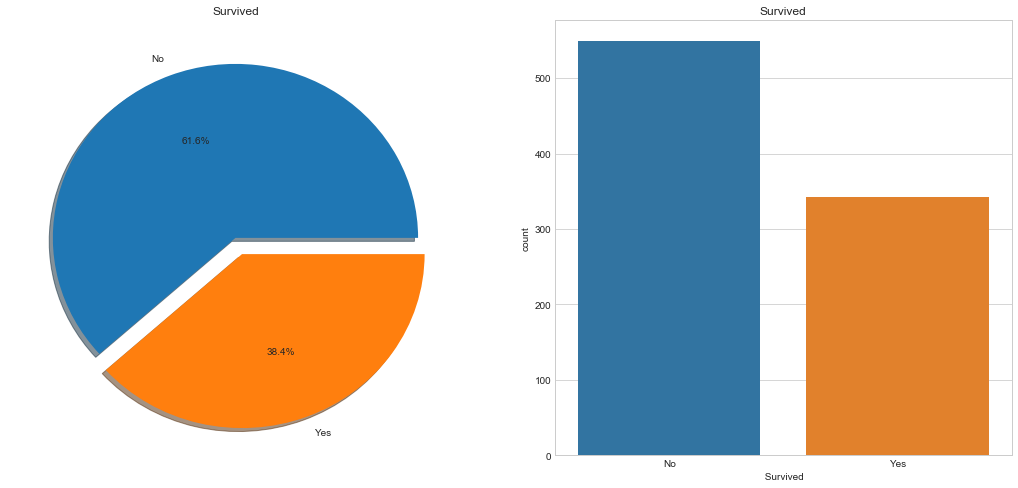

In [6]:
train[' Survived'] = train['Survived'].map({0:"No", 1:'Yes'})
fig, ax = plt.subplots(1,2,figsize=(18,8))
train[' Survived'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax=ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(' Survived', data = train, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

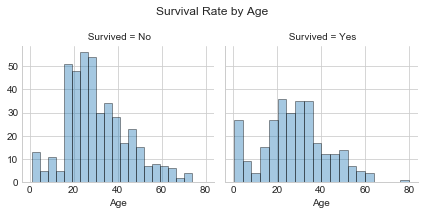

In [7]:
ax = sns.FacetGrid(train, col = ' Survived')
ax.map(sns.distplot, 'Age', bins = 20, kde = False, hist_kws = {'edgecolor':'black'})
plt.subplots_adjust(top = 0.8)
ax.fig.suptitle('Survival Rate by Age')

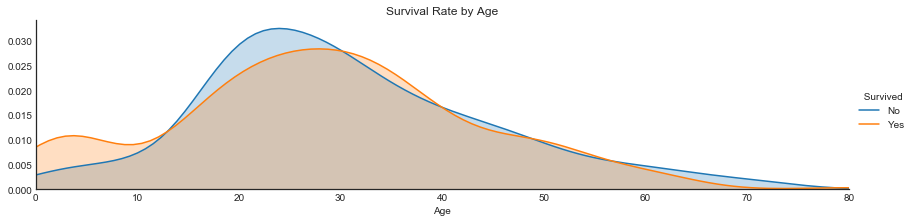

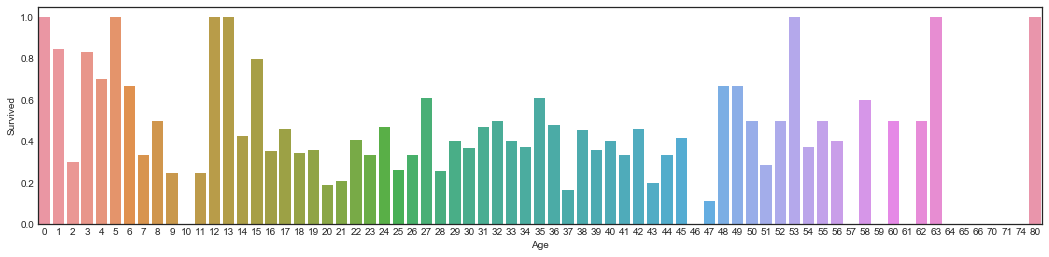

In [46]:
train['Age'] = (round(train['Age']))

ax = sns.FacetGrid(train, hue = ' Survived', aspect = 4)
ax.map(sns.kdeplot, 'Age', shade = True)
ax.set(xlim = (0, train['Age'].max()), title = 'Survival Rate by Age')
ax.add_legend()

fig, axis = plt.subplots(1,1, figsize = (18,4))
mean_age = train[['Age', 'Survived']].groupby(['Age'], as_index = False).mean()
mean_age['Age'] = mean_age['Age'].astype(int)
sns.barplot(x='Age', y= 'Survived', data = mean_age)

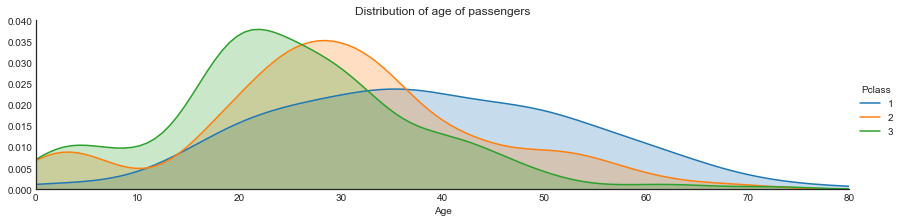

In [17]:
ax = sns.FacetGrid(train, hue = 'Pclass', aspect = 4)
ax.map(sns.kdeplot, 'Age', shade = True)
ax.set(xlim = (0, train['Age'].max()), ylim = (0,0.04), title = 'Distribution of age of passengers')
ax.add_legend()

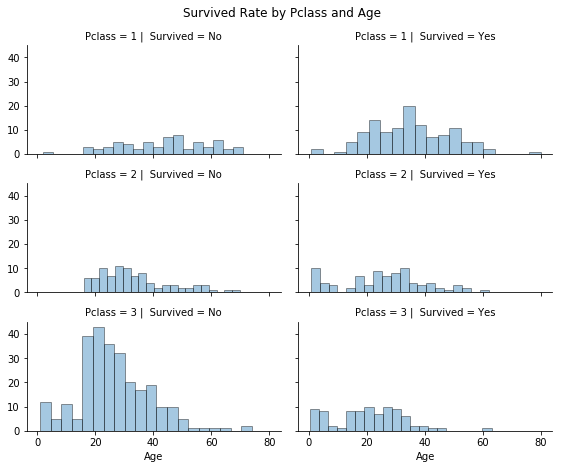

In [11]:
ax = sns.FacetGrid(train, col = ' Survived', row = 'Pclass', size = 2.2, aspect = 1.8)
ax.map(sns.distplot, 'Age', bins = 20, kde = False, hist_kws ={'edgecolor':'black'})
plt.subplots_adjust(top = 0.9)
ax.fig.suptitle('Survived Rate by Pclass and Age')

# 3. FEATURE ENGINNERING

In [12]:
train.drop(' Survived', inplace = True, axis = 1)
data = pd.concat([train, test])
data['Survived '] = data['Survived'].map({0:'No',1:'Yes'})

## 3.1. Handling with Missing Data

In [13]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Survived        418
dtype: int64

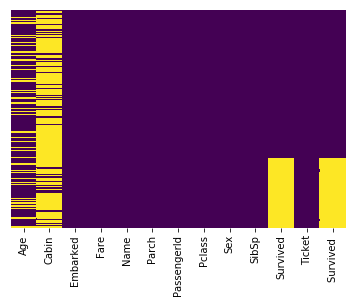

In [14]:
# yellow dash is NA values
sns.heatmap(data.isnull(), yticklabels=False, cbar = False,cmap = 'viridis')


### Extract title from Name

In [15]:
data['Title']= data['Name'].str.extract('([A-Za-z]+)\.',expand = False)
pd.crosstab(data['Title'],data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2



### Calculate average Age for each title and fill NA values


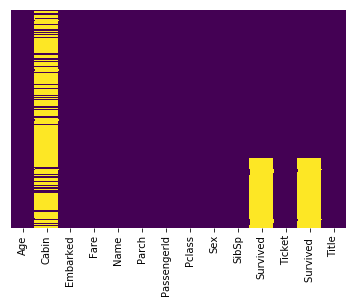

In [16]:
age_calc = data.groupby('Title')['Age'].mean()
data = data.assign(Age = data.apply(lambda x: x.Age if pd.notnull(x.Age) else age_calc[x.Title], axis = 1))
sns.heatmap(data.isnull(), yticklabels=False, cbar = False,cmap = 'viridis')

### Transform Age from numerical countinuous feature to numerical categorical feature

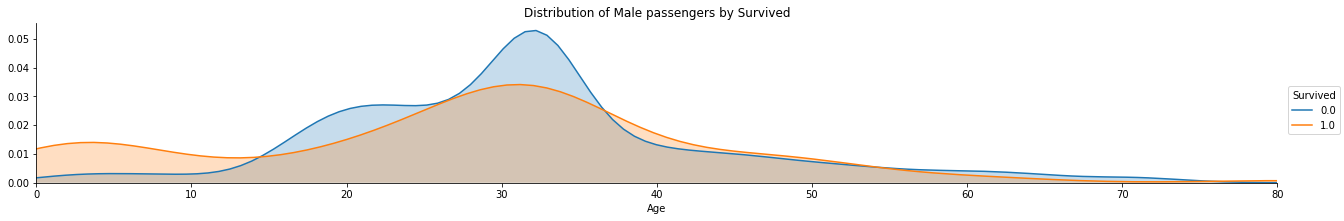

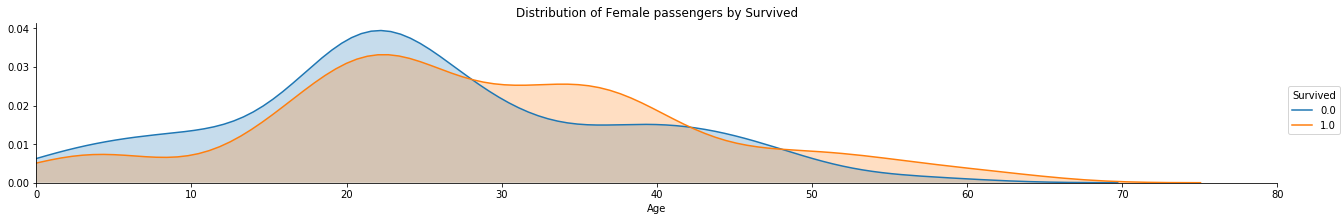

In [17]:
fig = sns.FacetGrid(data[data.Sex=='male'], hue = 'Survived', aspect=6)
fig.map(sns.kdeplot, 'Age', shade=True)
fig.set(xlim=(0 , data['Age'].max()),title = 'Distribution of Male passengers by Survived')
fig.add_legend()

fig = sns.FacetGrid(data[data.Sex=='female'], hue = 'Survived', aspect=6)
fig.map(sns.kdeplot, 'Age', shade=True)
fig.set(xlim=(0 , data['Age'].max()), title = 'Distribution of Female passengers by Survived')
fig.add_legend()

In [18]:
#data['AgeGroups'] = pd.cut(data['Age'], 5, labels = range(5)).astype(int)

data['AgeGroups'] = 0
data.loc[data['Age']<=14,'AgeGroups'] = 0
data.loc[(data['Age']>14) & (data['Age']<=30),'AgeGroups'] = 1
data.loc[(data['Age']>30) & (data['Age']<=50),'AgeGroups'] = 2
data.loc[(data['Age']>50) & (data['Age']<=60),'AgeGroups'] = 3
data.loc[data['Age']>60,'AgeGroups'] = 4

print('Survival Correlation by AgeGroups'+'\n'+'-'*30)
print(data[['AgeGroups','Survived']].groupby(['AgeGroups'], as_index = False).mean().sort_values(by='Survived', ascending = False))

Survival Correlation by AgeGroups
------------------------------
   AgeGroups  Survived
0          0  0.580247
3          3  0.404762
1          1  0.388587
2          2  0.343915
4          4  0.227273


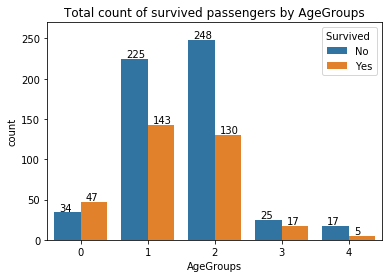

In [19]:
ax = sns.countplot('AgeGroups', hue = 'Survived ', data = data)
ax.set_title('Total count of survived passengers by AgeGroups')
ax.set(ylim = (0,270))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.08,height+2, '%.0f'%(height))

### Rename some titles and transform to numerical categorical feature

In [20]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [21]:
data['Title'] = data['Title'].replace(['Lady','Dona','Mme','Countess'], 'Mrs')
data['Title'] = data['Title'].replace(['Mlle','Ms'], 'Miss')
data['Title'] = data['Title'].replace(['Don', 'Capt', 'Col', 'Major', 'Sir', 'Jonkheer', 'Rev', 'Dr'], 'Rare')

print('Survival Correlation by Title'+'\n'+'-'*30)
print(data[['Title','Survived']].groupby(['Title'], as_index = False).mean().sort_values(by='Survived', ascending = False).reset_index().drop('index', axis = 1))

Survival Correlation by Title
------------------------------
    Title  Survived
0     Mrs  0.796875
1    Miss  0.702703
2  Master  0.575000
3    Rare  0.285714
4      Mr  0.156673


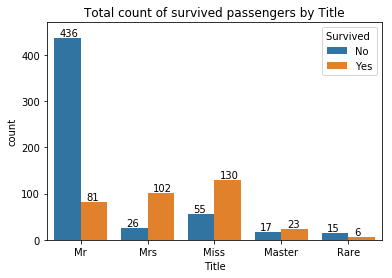

In [22]:
ax = sns.countplot('Title', hue = 'Survived ', data = data)
ax.set(ylim = (0,470))
ax.set_title("Total count of survived passengers by Title")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.08,height+4, '%.0f'%(height))

In [23]:
data['Title'] = data['Title'].map({'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}).astype(int)

### Fill NA value in Fare column

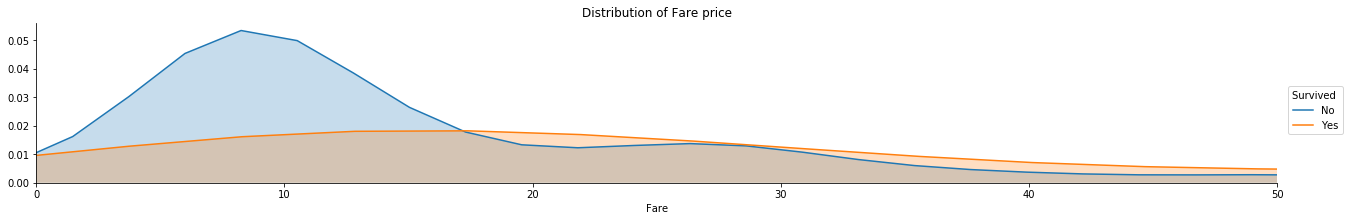

In [24]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

fig = sns.FacetGrid(data, hue = 'Survived ', aspect = 6)
fig.map(sns.kdeplot, 'Fare', shade = True)
fig.set(xlim = (0,50), title = 'Distribution of Fare price')
fig.add_legend()

In [25]:
data['FareCategory'] = 0
data.loc[data.Fare <= 8.0,'FareCategory'] = 0
data.loc[(data.Fare > 8.0) & (data.Fare <= 15.0),'FareCategory'] = 1
data.loc[(data.Fare > 15.0) & (data.Fare <= 31.0),'FareCategory'] = 2
data.loc[data.Fare > 31,'FareCategory'] = 3

print('Survival Correlation by FareCategory'+'\n'+'-'*30)
print(data[['FareCategory','Survived']].groupby(['FareCategory'], as_index = False).mean().sort_values(by='Survived', ascending = False).reset_index().drop('index', axis = 1))

Survival Correlation by FareCategory
------------------------------
   FareCategory  Survived
0             3  0.581081
1             2  0.469194
2             1  0.285714
3             0  0.215768


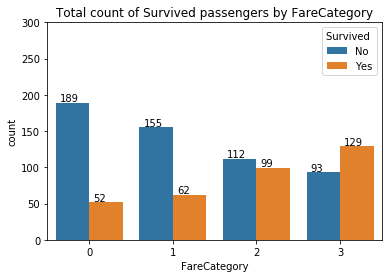

In [26]:
ax = sns.countplot('FareCategory', hue = 'Survived ', data = data)
ax.set(ylim = (0,300))
ax.set_title('Total count of Survived passengers by FareCategory')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.05,height+2, '%.0f'%(height))

### Fill NA values in Embarked column

In [27]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [28]:
data['Embarked'] = data['Embarked'].fillna('S')

print('Survival Correlation by Embarked'+'\n'+'-'*30)
print(data[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by='Survived', ascending = False).reset_index().drop('index', axis = 1))

Survival Correlation by Embarked
------------------------------
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


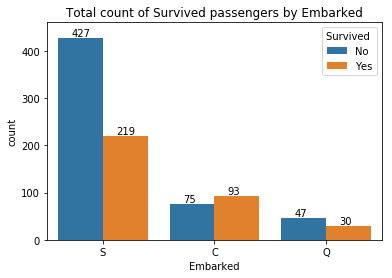

In [29]:
ax = sns.countplot('Embarked', hue = 'Survived ', data = data)
ax.set(ylim = (0,460))
ax.set_title('Total count of Survived passengers by Embarked')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.12,height+4, '%.0f'%(height))

In [30]:
data['Embarked'] = data['Embarked'].map({'S':1, 'C':2, 'Q':3}).astype(int)

### Extract first letter from Cabin column and transform to numerical feature

In [31]:
data['DeckCode'] = data['Cabin'].str.slice(0,1)
data['DeckCode'] = data['DeckCode'].fillna('X')
data['DeckCode'].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: DeckCode, dtype: int64

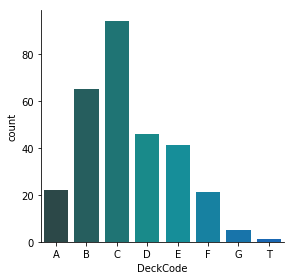

In [32]:
sns.factorplot('DeckCode', data = data[data['DeckCode'] != 'X'].sort_values('DeckCode'), kind = 'count', palette = 'winter_d')

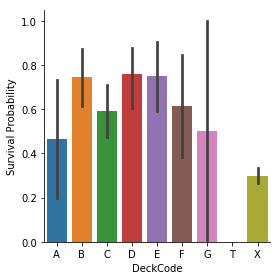

In [33]:
fig = sns.factorplot(y="Survived",x="DeckCode",data=data,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
fig = fig.set_ylabels("Survival Probability")
fig

In [34]:
data['DeckCode'] = data['DeckCode'].map({'C':1, 'B':2, 'D':3, 'E':4, 'A':5, 'F':6, 'G':7, 'T':0, 'X':0}).astype(int)
print('Survival Correlation by DeckCode'+'\n'+'-'*30)
print(data[['DeckCode','Survived']].groupby(['DeckCode'], as_index = False).mean().sort_values(by='Survived', ascending = False).reset_index().drop('index', axis = 1))

Survival Correlation by DeckCode
------------------------------
   DeckCode  Survived
0         3  0.757576
1         4  0.750000
2         2  0.744681
3         6  0.615385
4         1  0.593220
5         7  0.500000
6         5  0.466667
7         0  0.299419


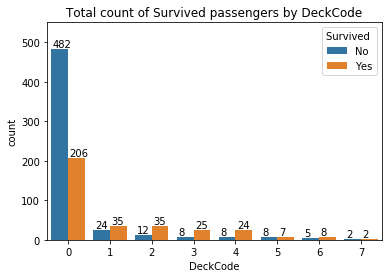

In [35]:
ax = sns.countplot('DeckCode', hue = 'Survived ', data = data)
ax.set(ylim = (0,550))
ax.set_title('Total count of Survived passengers by DeckCode')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.04,height+5, '%.0f'%(height))

### Create custom Room Band from Cabin columns

In [36]:
data['Room'] = data['Cabin'].str.slice(1,5).str.extract('([0-9]+)', expand = False).fillna(0).astype(int)
data['RoomCategory'] = 0
data.loc[(data.Room > 0) & (data.Room <= 20), 'RoomCategory'] = 1
data.loc[(data.Room > 20) & (data.Room <= 40), 'RoomCategory'] = 2
data.loc[(data.Room > 40) & (data.Room <= 80), 'RoomCategory'] = 3
data.loc[data.Room > 80, 'RoomCategory'] = 4

print('Survival Correlation by RoomCategory'+'\n'+'-'*30)
print(data[['RoomCategory','Survived']].groupby(['RoomCategory'], as_index = False).mean().sort_values(by='Survived', ascending = False).reset_index().drop('index', axis = 1))

Survival Correlation by RoomCategory
------------------------------
   RoomCategory  Survived
0             1  0.755556
1             2  0.660377
2             3  0.649123
3             4  0.622222
4             0  0.301013


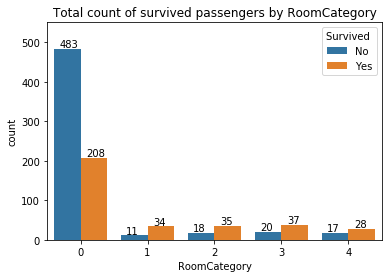

In [37]:
ax = sns.countplot('RoomCategory', hue = 'Survived ', data = data)
ax.set(ylim = (0,550))
ax.set_title('Total count of survived passengers by RoomCategory')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.08,height+4, '%.0f'%(height))

### Determine Board side by checking Ticket number

In [38]:
data['Odd'] = data['Ticket'].str.slice(-1)
data['Odd'].unique()

array(['1', '9', '2', '3', '0', '7', '6', '5', '8', '4', 'E'], dtype=object)

In [39]:
data.loc[data['Odd']=='E','Ticket']

179    LINE
271    LINE
302    LINE
597    LINE
Name: Ticket, dtype: object

In [40]:
data.loc[data['Ticket']=='LINE','Ticket'] = 'LINE1'

data['Odd'] = data['Ticket'].str.slice(-1).astype(int).map(lambda x: x % 2 == 0).astype(int)

print('Survival Correlation by Odd'+'\n'+'-'*30)
print(data[['Odd','Survived']].groupby(['Odd'], as_index = False).mean().sort_values(by='Survived', ascending = False).reset_index().drop('index', axis = 1))

Survival Correlation by Odd
------------------------------
   Odd  Survived
0    1  0.389021
1    0  0.379237


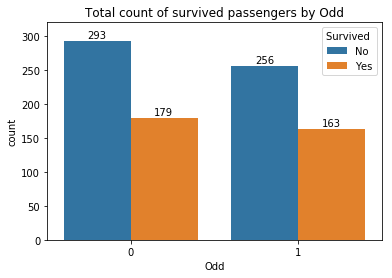

In [41]:
ax = sns.countplot('Odd', hue = 'Survived ', data = data)
ax.set(ylim = (0,320))
ax.set_title('Total count of survived passengers by Odd')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.14,height+4, '%.0f'%(height))

### Greate FamilySize bands

In [42]:
data['FamilySize'] = (data['SibSp']+data['Parch']).astype(int)

print('Survival Correlation by FamilySize'+'\n'+'-'*30)
print(data[['FamilySize','Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by='Survived', ascending = False).reset_index().drop('index', axis = 1))

Survival Correlation by FamilySize
------------------------------
   FamilySize  Survived
0           3  0.724138
1           2  0.578431
2           1  0.552795
3           6  0.333333
4           0  0.303538
5           4  0.200000
6           5  0.136364
7           7  0.000000
8          10  0.000000


In [43]:
data['FamilySizeGroup'] = 0
data.loc[data.FamilySize == 1, 'FamilySizeGroup'] = 1
data.loc[data.FamilySize == 2, 'FamilySizeGroup'] = 2
data.loc[data.FamilySize >=3, 'FamilySizeGroup'] = 3

print('Survival Correlation by FamilySizeGroup'+'\n'+'-'*30)
print(data[['FamilySizeGroup','Survived']].groupby(['FamilySizeGroup'], as_index = False).mean().sort_values(by='Survived', ascending = False).reset_index().drop('index', axis = 1))

Survival Correlation by FamilySizeGroup
------------------------------
   FamilySizeGroup  Survived
0                2  0.578431
1                1  0.552795
2                3  0.340659
3                0  0.303538


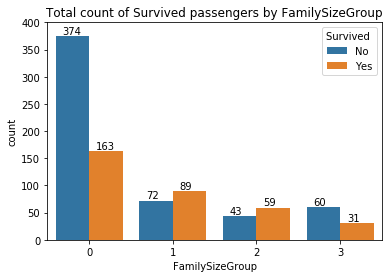

In [44]:
ax = sns.countplot('FamilySizeGroup', hue = 'Survived ', data = data)
ax.set(ylim = (0,400))
ax.set_title('Total count of Survived passengers by FamilySizeGroup')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.08,height+4, '%.0f'%(height))

In [45]:
# 0 - was Alone, 1 - wasn't Alone
data['Alone'] = (data['SibSp']+data['Parch']).astype(int)
data['Alone'].loc[data['Alone'] >=1] = 1

print('Survival Correlation by Alone'+'\n'+'-'*30)
print(data[['Alone','Survived']].groupby(['Alone'], as_index = False).mean().sort_values(by='Survived', ascending = False).reset_index().drop('index', axis = 1))

Survival Correlation by Alone
------------------------------
   Alone  Survived
0      1  0.505650
1      0  0.303538


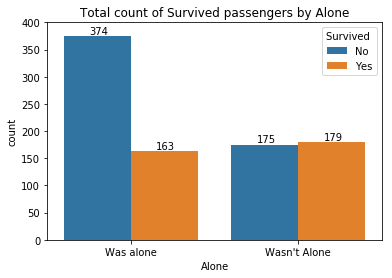

In [46]:
ax = sns.countplot('Alone', hue='Survived ', data = data)
ax.set(ylim = (0,400))
ax.set_xticklabels(['Was alone','Wasn\'t Alone'])
ax.set_title('Total count of Survived passengers by Alone')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.15,height+4, '%.0f'%(height))

### Mapping Sex column

In [47]:
data[['Sex','Survived']].groupby('Sex').agg(['count','mean'])

Survived          
          count      mean
Sex                      
female      314  0.742038
male        577  0.188908

In [48]:
data['Sex'] = data['Sex'].map({'female':0, 'male':1}).astype(int)

# 4. Feature correlation

In [50]:
train_size = train.shape[0]
data.columns.tolist()

['Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket',
 'Survived ',
 'Title',
 'AgeGroups',
 'FareCategory',
 'DeckCode',
 'Room',
 'RoomCategory',
 'Odd',
 'FamilySize',
 'FamilySizeGroup',
 'Alone']

In [52]:
data.drop(['Cabin','Name','PassengerId','Ticket','Survived '], inplace = True,axis = 1)
df = data[:train_size]

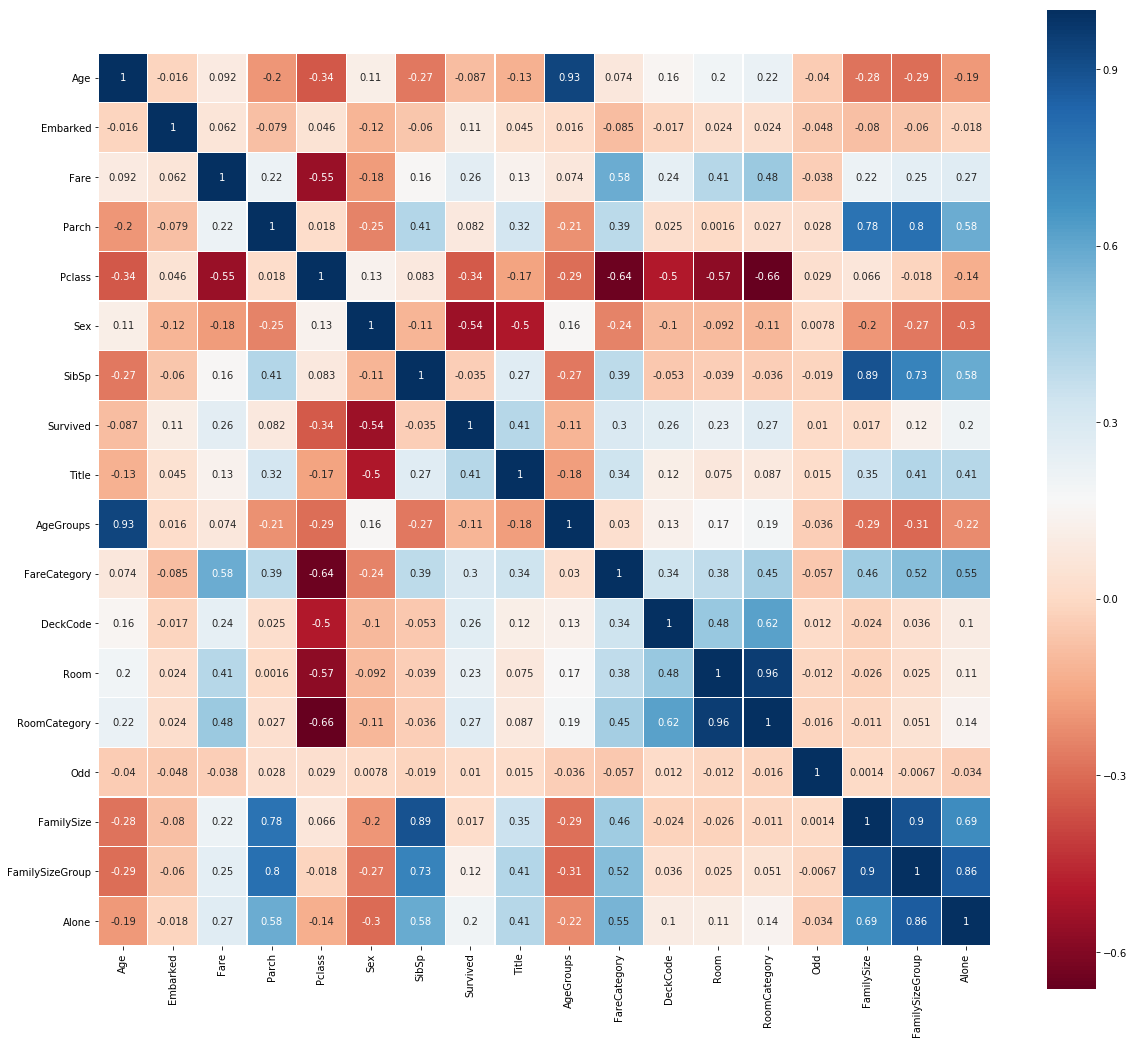

In [53]:
plt.figure(figsize = (20,18))
sns.heatmap(df.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = plt.cm.RdBu, annot = True)

In [55]:
data.to_csv('data_df.csv', sep='\t')